In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import sys
import os

In [ ]:
import idd_climate_models.constants as rfc
TC_RISK_OUTPUT_PATH = rfc.TC_RISK_OUTPUT_PATH
threshold_dict = rfc.threshold_dict

In [ ]:
MODELS_TO_RUN = ['ACCESS-CM2', 'EC-Earth3', 'EC-Earth3-Veg','EC-Earth3-Veg-LR', 'MIROC6', 'MPI-ESM1-2-HR', 'MPI-ESM1-2-LR', 'MRI-ESM2-0']
BIN_SIZE_YEARS = 20
DATA_SOURCE = "cmip6"
SCENARIOS = ['historical', 'ssp126', 'ssp245', 'ssp585']
NUM_DRAWS = rfc.NUM_DRAWS
BASINS = ['EP', 'NA', 'NI', 'SI', 'SP', 'WP'] 



def get_time_bins(scenario_name, bin_size_years):
    date_ranges = rfc.VALIDATION_RULES['tc_risk']['time-period']['date_ranges']
    if scenario_name not in date_ranges:
        print(f"Warning: No date range found for scenario '{scenario_name}'")
        return []
    start_year, end_year = date_ranges[scenario_name]
    return [(y, min(y + bin_size_years - 1, end_year)) for y in range(start_year, end_year + 1, bin_size_years)]

TIME_BINS = {
    scenario: get_time_bins(scenario, BIN_SIZE_YEARS)
    for scenario in rfc.SCENARIOS
}

target_output_path = rfc.TC_RISK_OUTPUT_PATH / DATA_SOURCE
def get_output_dir(model, scenario, time_bin):
    output_dir_parent = f'{target_output_path}/{model}/r1i1p1f1/{scenario}/{time_bin[0]}-{time_bin[1]}'
    return Path(output_dir_parent)

def get_basin_dir(model, scenario, time_bin, basin):
    output_dir = get_output_dir(model, scenario, time_bin)
    return output_dir / basin

def get_track_path(model, scenario, time_bin, basin, draw):
    output_dir = get_output_dir(model, scenario, time_bin)
    draw_text = f'_e{draw - 1}' if draw > 0 else ''
    track_file = f'tracks_{basin}_{model}_{scenario}_r1i1p1f1_{time_bin[0]}01_{time_bin[1]}12{draw_text}.nc'
    return output_dir / basin / track_file

In [ ]:
basin = BASINS[0]
scenario = 'ssp245'
model = MODELS_TO_RUN[0]
DRAWS = range(NUM_DRAWS)

for 

time_datasets = []
years = []
for time_bin in TIME_BINS[scenario]:
    data_dir = get_basin_dir(model, scenario, time_bin, basin)
    
    # Get all .nc files and sort them so the file without extension comes first
    fn_list = sorted([str(f) for f in data_dir.glob('*.nc')], 
                     key=lambda x: (('_e' in x), x))  # Files without '_e' come first
    
    # This creates a dataset with an 'ensemble' dimension (0-24)
    ds_time = xr.open_mfdataset(
        fn_list, 
        concat_dim='ensemble', 
        combine='nested',
        coords='minimal',
        compat='override'
    )
    time_datasets.append(ds_time)
    years.extend(list(range(time_bin[0], time_bin[1] + 1)))


In [74]:
threshold = list(threshold_dict.keys())[0]

In [10]:
years

[2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 2022,
 2023,
 2024,
 2025,
 2026,
 2027,
 2028,
 2029,
 2030,
 2031,
 2032,
 2033,
 2034,
 2035,
 2036,
 2037,
 2038,
 2039,
 2040,
 2041,
 2042,
 2043,
 2044,
 2045,
 2046,
 2047,
 2048,
 2049,
 2050,
 2051,
 2052,
 2053,
 2054,
 2055,
 2056,
 2057,
 2058,
 2059,
 2060,
 2061,
 2062,
 2063,
 2064,
 2065,
 2066,
 2067,
 2068,
 2069,
 2070,
 2071,
 2072,
 2073,
 2074,
 2075,
 2076,
 2077,
 2078,
 2079,
 2080,
 2081,
 2082,
 2083,
 2084,
 2085,
 2086,
 2087,
 2088,
 2089,
 2090,
 2091,
 2092,
 2093,
 2094,
 2095,
 2096,
 2097,
 2098,
 2099,
 2100]

In [ ]:
counts = {}

for i in range(ds.sizes['n_trk']):
    year = int(track_years[i])
    vmax_track = vmax[i, :]
    if np.nanmax(vmax_track) > threshold:
        counts[year] = counts.get(year, 0) + 1

years = sorted(counts.keys())
data = [counts[year] for year in years]

plt.figure(figsize=(12, 6))
plt.plot(years, data, marker='o')
plt.xlabel('Year')
plt.ylabel('Number of tracks exceeding 30')
plt.title('Tracks exceeding 30 by year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

'any'

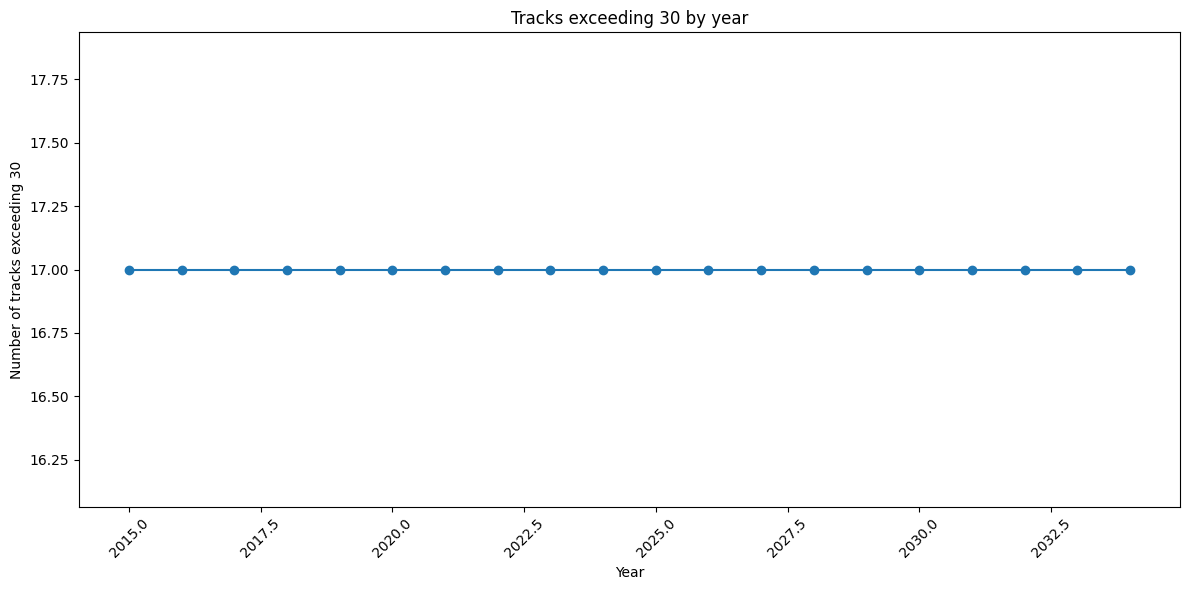

In [62]:
threshold = 30
counts = {}

for i in range(ds.sizes['n_trk']):
    year = int(track_years[i])
    vmax_track = vmax[i, :]
    if np.nanmax(vmax_track) > threshold:
        counts[year] = counts.get(year, 0) + 1

years = sorted(counts.keys())
data = [counts[year] for year in years]

plt.figure(figsize=(12, 6))
plt.plot(years, data, marker='o')
plt.xlabel('Year')
plt.ylabel('Number of tracks exceeding 30')
plt.title('Tracks exceeding 30 by year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [61]:
track_years

array([2015., 2015., 2015., 2015., 2015., 2015., 2015., 2015., 2015.,
       2015., 2015., 2015., 2015., 2015., 2015., 2015., 2015., 2016.,
       2016., 2016., 2016., 2016., 2016., 2016., 2016., 2016., 2016.,
       2016., 2016., 2016., 2016., 2016., 2016., 2016., 2017., 2017.,
       2017., 2017., 2017., 2017., 2017., 2017., 2017., 2017., 2017.,
       2017., 2017., 2017., 2017., 2017., 2017., 2018., 2018., 2018.,
       2018., 2018., 2018., 2018., 2018., 2018., 2018., 2018., 2018.,
       2018., 2018., 2018., 2018., 2018., 2019., 2019., 2019., 2019.,
       2019., 2019., 2019., 2019., 2019., 2019., 2019., 2019., 2019.,
       2019., 2019., 2019., 2019., 2020., 2020., 2020., 2020., 2020.,
       2020., 2020., 2020., 2020., 2020., 2020., 2020., 2020., 2020.,
       2020., 2020., 2020., 2021., 2021., 2021., 2021., 2021., 2021.,
       2021., 2021., 2021., 2021., 2021., 2021., 2021., 2021., 2021.,
       2021., 2021., 2022., 2022., 2022., 2022., 2022., 2022., 2022.,
       2022., 2022.,

In [57]:
threshold = 30
counts = {}

for i in range(ds.sizes['n_trk']):
    year = track_years[i]
    vmax_track = vmax[i, :]
    if np.nanmax(vmax_track) > threshold:
        counts[year] = counts.get(year, 0) + 1


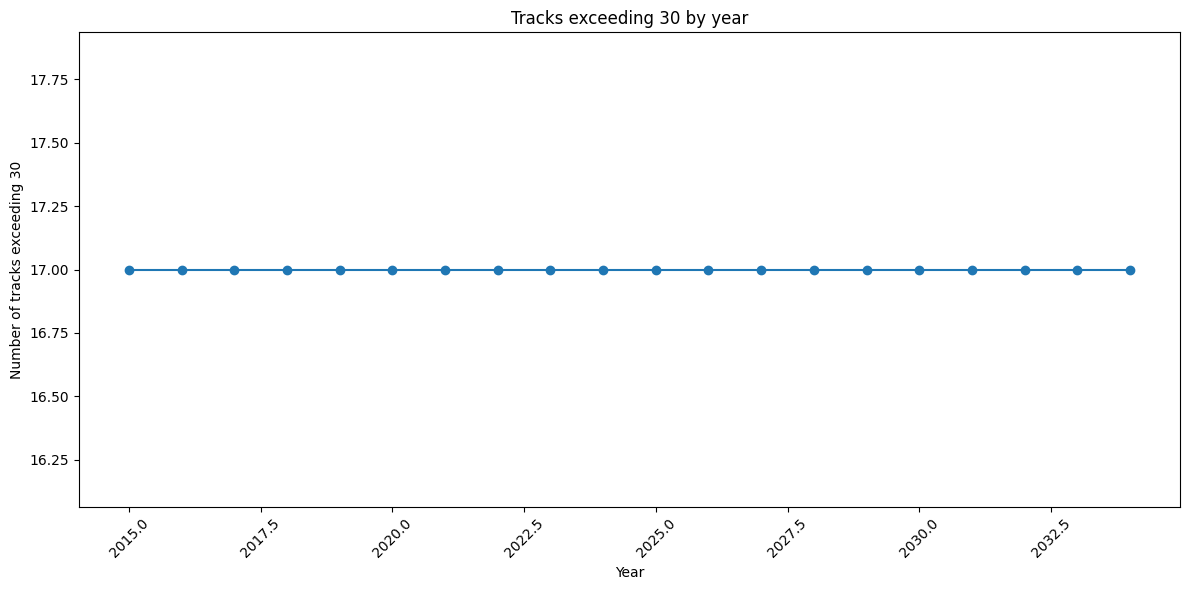

In [59]:
# ...existing code...

import matplotlib.pyplot as plt

years = sorted(counts.keys())
data = [counts[year] for year in years]

plt.figure(figsize=(12, 6))
plt.plot(years, data, marker='o')
plt.xlabel('Year')
plt.ylabel('Number of tracks exceeding 30')
plt.title('Tracks exceeding 30 by year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ...existing code...

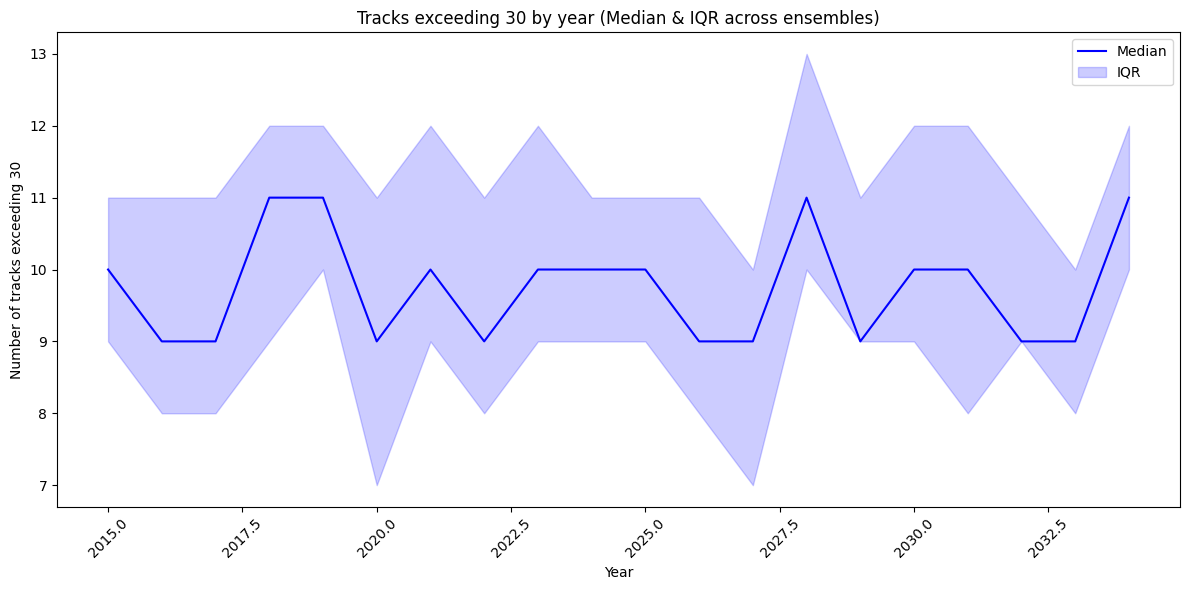

In [48]:
# ...existing code...

import numpy as np
import matplotlib.pyplot as plt

years = sorted({year for c in counts.values() for year in c})
data = []
for year in years:
    year_counts = [counts[ens].get(year, 0) for ens in counts]
    data.append(year_counts)

data = np.array(data)  # shape: (n_years, n_ensembles)
medians = np.median(data, axis=1)
q1 = np.percentile(data, 25, axis=1)
q3 = np.percentile(data, 75, axis=1)

plt.figure(figsize=(12, 6))
plt.plot(years, medians, label='Median', color='blue')
plt.fill_between(years, q1, q3, color='blue', alpha=0.2, label='IQR')
plt.xlabel('Year')
plt.ylabel('Number of tracks exceeding 30')
plt.title('Tracks exceeding 30 by year (Median & IQR across ensembles)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# ...existing code...

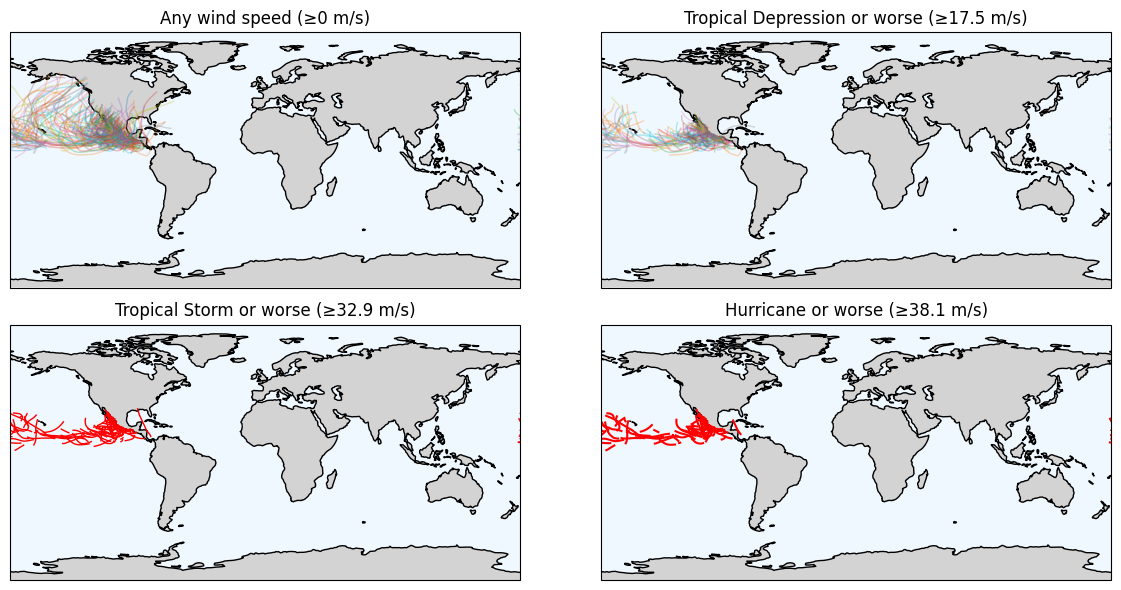

In [40]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

ensemble_idx = 0  # Change to select a different ensemble member

fig = plt.figure(figsize=(12, 6))
gs = fig.add_gridspec(2, 2)
for idx, (threshold_key, threshold_info) in enumerate(threshold_dict.items()):
    wind_speed_threshold = threshold_info['wind_speed']
    ax = fig.add_subplot(gs[idx // 2, idx % 2], projection=ccrs.PlateCarree())

    # Collect all valid lon/lat for this threshold
    all_valid_lon = []
    all_valid_lat = []
    for i in range(ds.sizes['n_trk']):
        lon = ds['lon_trks'][ensemble_idx, i, :].values
        lat = ds['lat_trks'][ensemble_idx, i, :].values
        v_max = ds['vmax_trks'][ensemble_idx, i, :].values

        valid = np.isfinite(lon) & np.isfinite(lat) & (v_max >= wind_speed_threshold)
        if np.any(valid):
            first_valid = np.argmax(valid)
            lon = lon[first_valid:]
            lat = lat[first_valid:]
            v_max = v_max[first_valid:]
            valid = valid[first_valid:]
            first_nan = np.argmax(~valid)
            if not np.any(~valid):
                end = len(lon)
            else:
                end = first_nan
            all_valid_lon.extend(lon[:end][valid[:end]])
            all_valid_lat.extend(lat[:end][valid[:end]])

    # # Compute bounding box
    # if all_valid_lon and all_valid_lat:
    #     min_lon, max_lon = np.min(all_valid_lon), np.max(all_valid_lon)
    #     min_lat, max_lat = np.min(all_valid_lat), np.max(all_valid_lat)
    #     # Add a small margin
    #     margin_lon = (max_lon - min_lon) * 0.05
    #     margin_lat = (max_lat - min_lat) * 0.05
    #     ax.set_extent([min_lon - margin_lon, max_lon + margin_lon,
    #                    min_lat - margin_lat, max_lat + margin_lat], crs=ccrs.PlateCarree())
    # else:
    #     ax.set_global()
    ax.set_global()
    ax.coastlines()
    ax.add_feature(cfeature.LAND, facecolor='lightgray')
    ax.add_feature(cfeature.OCEAN, facecolor='aliceblue')

    # Plot tracks again
    for i in range(ds.sizes['n_trk']):
        lon = ds['lon_trks'][ensemble_idx, i, :].values
        lat = ds['lat_trks'][ensemble_idx, i, :].values
        v_max = ds['vmax_trks'][ensemble_idx, i, :].values

        valid = np.isfinite(lon) & np.isfinite(lat) & (v_max >= wind_speed_threshold)
        if np.any(valid):
            first_valid = np.argmax(valid)
            lon = lon[first_valid:]
            lat = lat[first_valid:]
            v_max = v_max[first_valid:]
            valid = valid[first_valid:]
            first_nan = np.argmax(~valid)
            if not np.any(~valid):
                end = len(lon)
            else:
                end = first_nan
            if idx > 1:
                ax.plot(lon[:end], lat[:end], transform=ccrs.PlateCarree(), alpha=1, linewidth=idx/2, color='red')
            else:
                ax.plot(lon[:end], lat[:end], transform=ccrs.PlateCarree(), alpha=0.3, linewidth=1)

    ax.set_title(threshold_info["name"])
plt.tight_layout()
plt.show()


In [13]:

output_path = get_output_dir(model, scenario, time_bin)
print(f"Output path: {output_path}")
track_path = get_track_path(model, scenario, time_bin, basin, draw=0)
print(f"Track path: {track_path}")

Output path: /mnt/team/rapidresponse/pub/tropical-storms/tc_risk/output/cmip6/ACCESS-CM2/r1i1p1f1/ssp245/2095-2100
Track path: /mnt/team/rapidresponse/pub/tropical-storms/tc_risk/output/cmip6/ACCESS-CM2/r1i1p1f1/ssp245/2095-2100/EP/tracks_EP_ACCESS-CM2_ssp245_r1i1p1f1_209501_210012.nc


In [14]:
import xarray as xr
ds = xr.open_dataset(track_path)

In [15]:
ds

<xarray.Dataset> Size: 5MB
Dimensions:          (n_trk: 102, time: 721, year: 6, basin: 7, month: 12)
Coordinates:
  * n_trk            (n_trk) int64 816B 0 1 2 3 4 5 6 ... 95 96 97 98 99 100 101
  * time             (time) float64 6kB 0.0 3.6e+03 ... 2.588e+06 2.592e+06
  * year             (year) int64 48B 2095 2096 2097 2098 2099 2100
  * basin            (basin) <U2 56B 'AU' 'EP' 'NA' 'NI' 'SI' 'SP' 'WP'
  * month            (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
Data variables: (12/13)
    lon_trks         (n_trk, time) float64 588kB ...
    lat_trks         (n_trk, time) float64 588kB ...
    u250_trks        (n_trk, time) float64 588kB ...
    v250_trks        (n_trk, time) float64 588kB ...
    u850_trks        (n_trk, time) float64 588kB ...
    v850_trks        (n_trk, time) float64 588kB ...
    ...               ...
    m_trks           (n_trk, time) float64 588kB ...
    vmax_trks        (n_trk, time) float64 588kB ...
    tc_month         (n_trk) float64 816B ...
    tc_basins        (n_trk) <U2 816B ...
    tc_years         (n_trk) int64 816B ...
    seeds_per_month  (year, basin, month) float64 4kB ...

In [71]:
time_datasets

[<xarray.Dataset> Size: 442MB
 Dimensions:          (ensemble: 25, n_trk: 340, time: 721, year: 20, basin: 7,
                       month: 12)
 Coordinates:
   * n_trk            (n_trk) int64 3kB 0 1 2 3 4 5 6 ... 334 335 336 337 338 339
   * time             (time) float64 6kB 0.0 3.6e+03 ... 2.588e+06 2.592e+06
   * year             (year) int64 160B 2015 2016 2017 2018 ... 2032 2033 2034
   * basin            (basin) <U2 56B 'AU' 'EP' 'NA' 'NI' 'SI' 'SP' 'WP'
   * month            (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
 Dimensions without coordinates: ensemble
 Data variables: (12/13)
     lon_trks         (ensemble, n_trk, time) float64 49MB dask.array<chunksize=(1, 340, 721), meta=np.ndarray>
     lat_trks         (ensemble, n_trk, time) float64 49MB dask.array<chunksize=(1, 340, 721), meta=np.ndarray>
     u250_trks        (ensemble, n_trk, time) float64 49MB dask.array<chunksize=(1, 340, 721), meta=np.ndarray>
     v250_trks        (ensemble, n_trk, time) float64 49MB da